# Imports

In [1]:
import warnings

import pandas as pd
import numpy as np

from functions.loading import load_data

from functions.training_pipeline import training_pipeline
from functions.models import xgboost_model, catboost_model, lgbm_model

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

# Parameters definition

In [2]:
# paths
path_rawdata = 'data/raw_data/'
path_models = 'models/proprietary_data/'
path_Benchmark = 'Benchmark/'
path_results = 'results/proprietary_data/'
path_plot = path_results +'plot/'
path_intermediary = 'data/intermediary_data/proprietary_data/'
path_plot = 'results/proprietary_data/plot/'

# Training parameters
targets = ["CF1_log","CF2_log","CF3_log", "CF123_log"]
models = {
        "xgboost": xgboost_model,
        "catboost": catboost_model,
        "lgbm": lgbm_model,
}
training_parameters = {
    "seed":0,
    "n_iter":10,
    "extended_features": [
            "Revenue_log",
            "EMP_log",
            "Asset_log",
            "NPPE_log",
            "CapEx_log",
            "Age",
            "CapInten",
            "GMAR",
            "Leverage",
            "Price",
            "FuelIntensity",
            "FiscalYear",
            "ENEConsume_log",
            "ENEProduce_log",
            "INTAN_log",
            "AccuDep_log",
            "COGS_log",
        ],
    "selec_sect":["GICSSubInd", "GICSInd", "GICSGroup"],
    "cross_val": False,
}
restricted_features=False
save=True,

# Results containers
Summary_Final=[]
Summary_Final_train = []
ensemble =[]
summary_metrics_detailed = pd.DataFrame()
estimated_scopes = []

# Data Loading 

In [3]:
preprocessed_dataset = load_data(path_rawdata, save=True)

# Training pipeline 

CF1_log
Using pre created preprocessed files
preprocessing done
modelisation done
CF2_log
Using pre created preprocessed files
preprocessing done
modelisation done
CF3_log
Using pre created preprocessed files
preprocessing done
modelisation done
CF123_log
Using pre created preprocessed files
preprocessing done
modelisation done


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

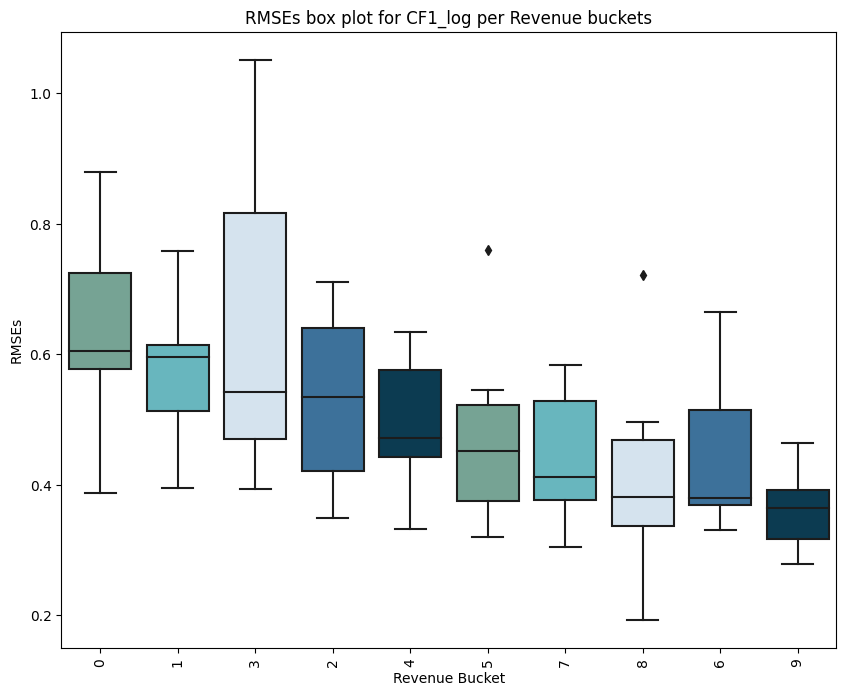

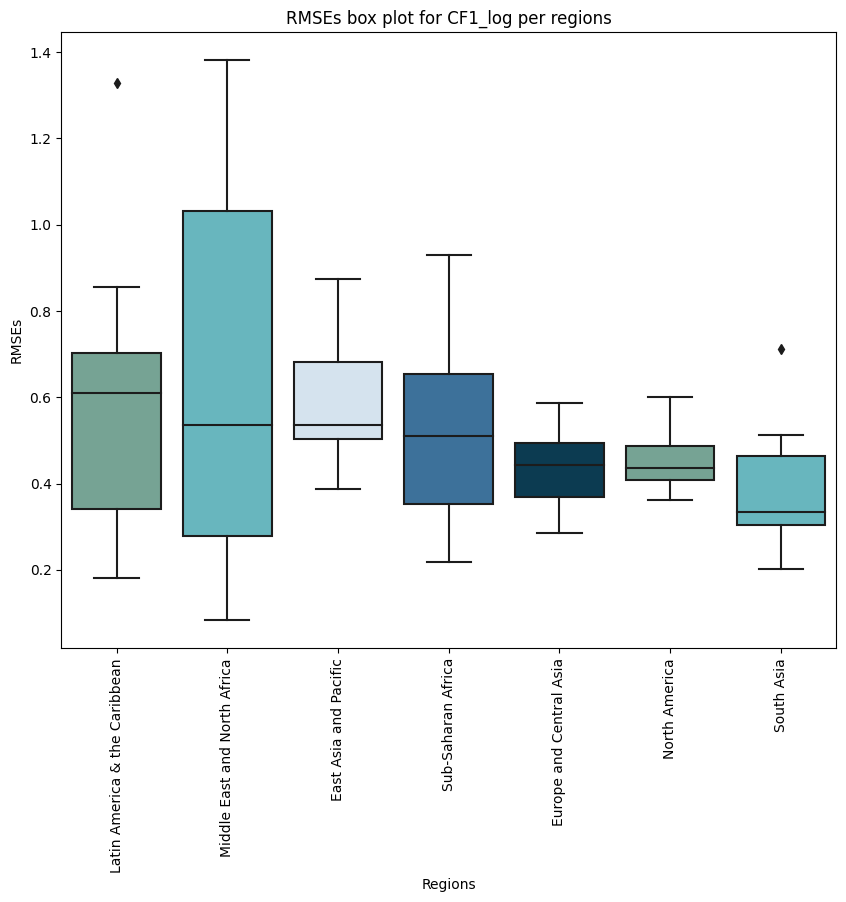

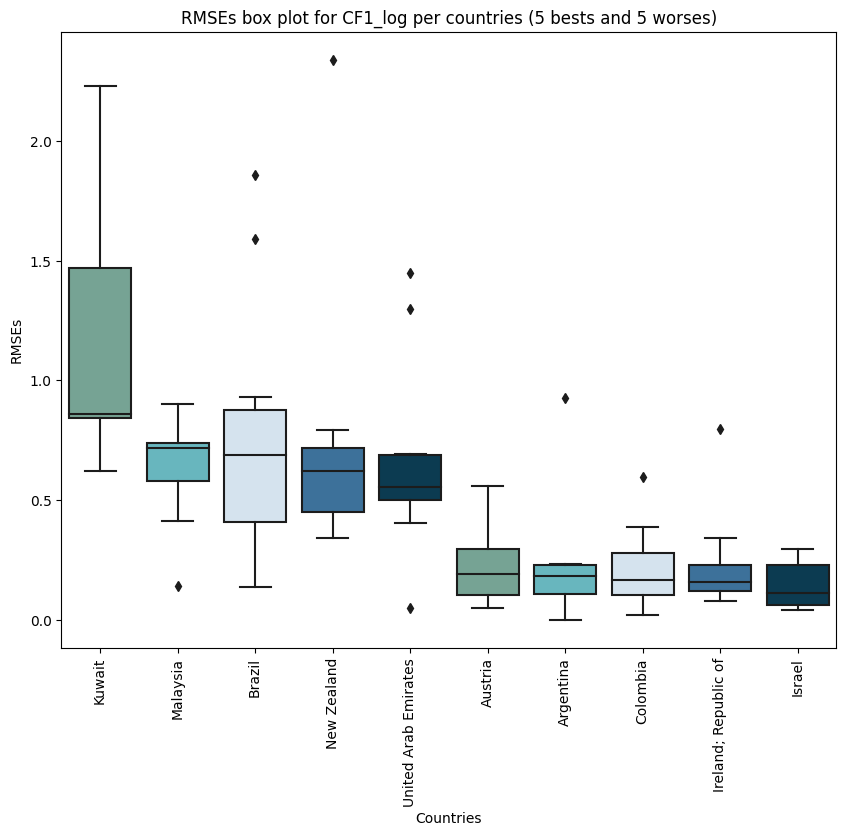

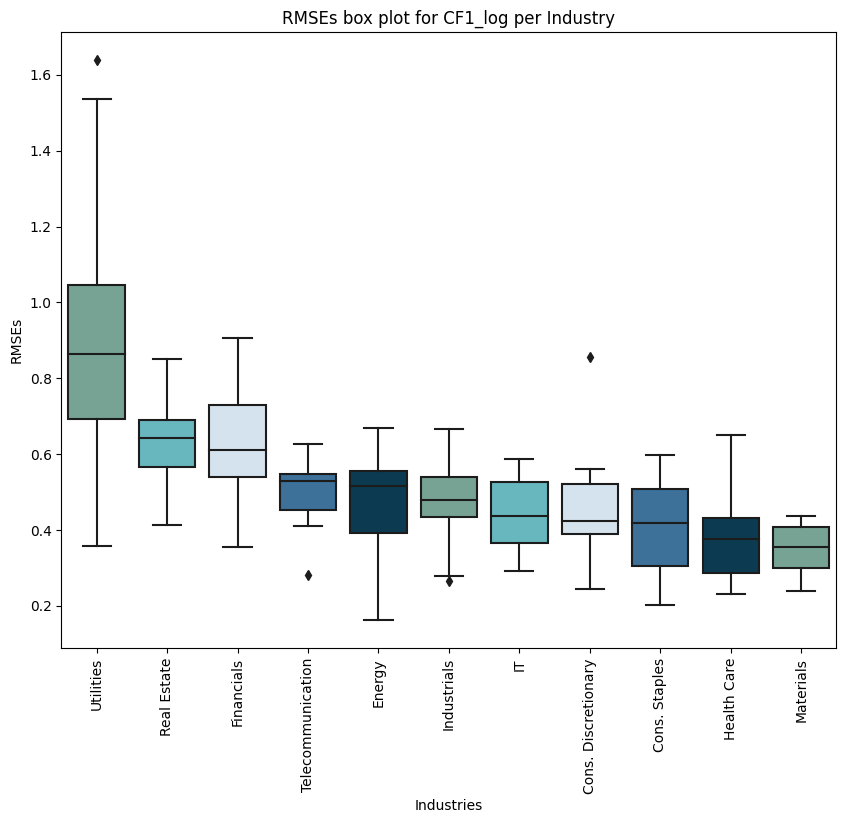

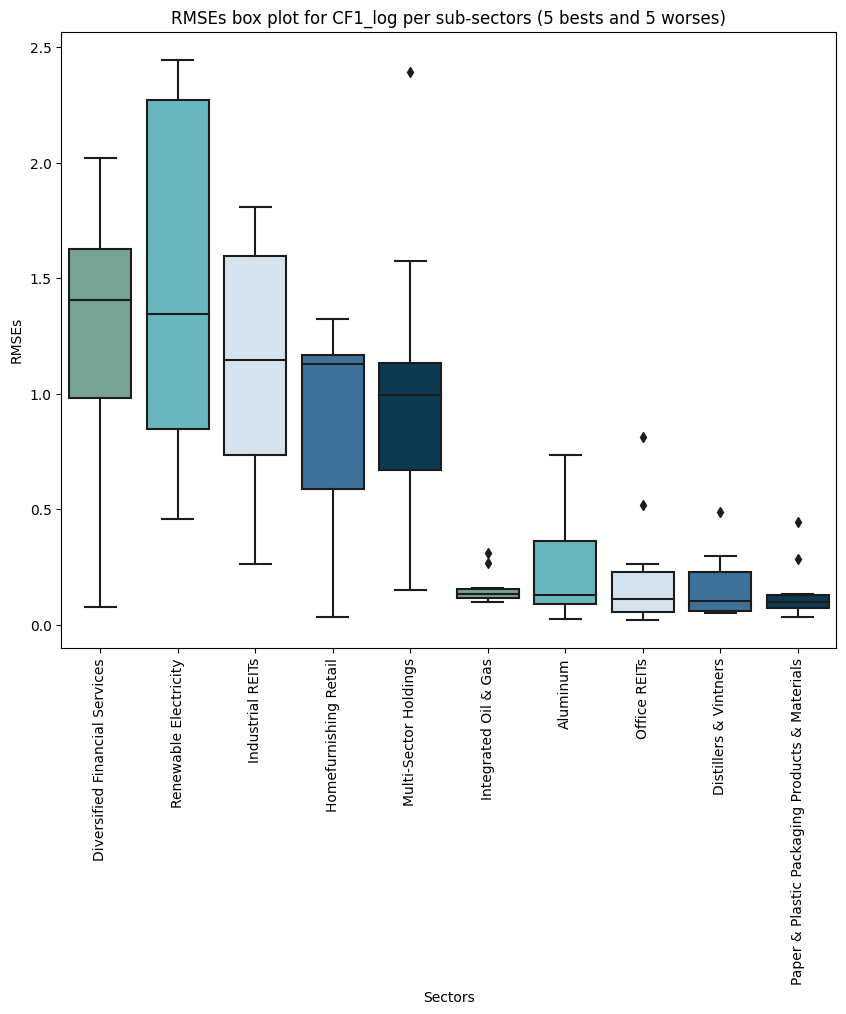

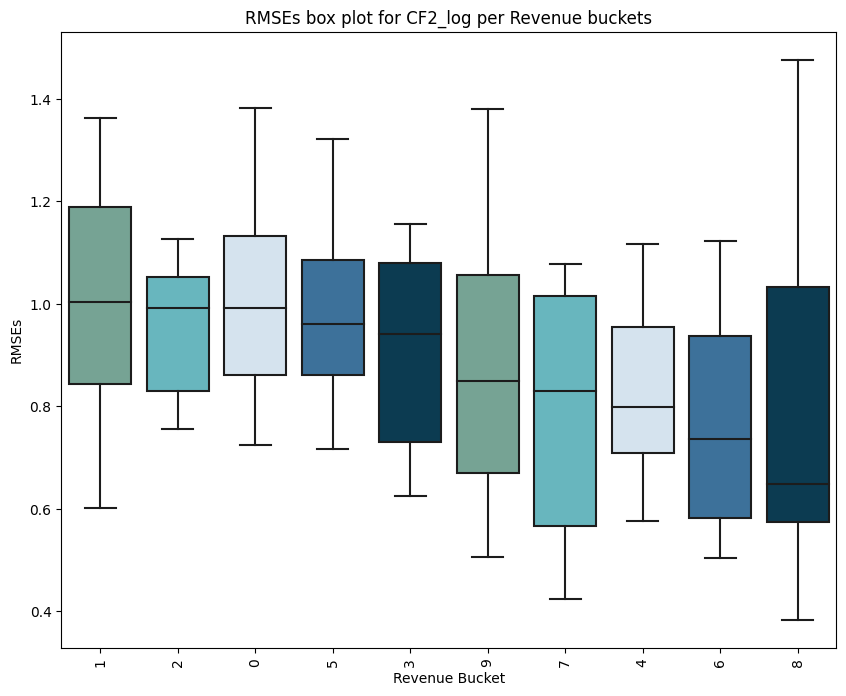

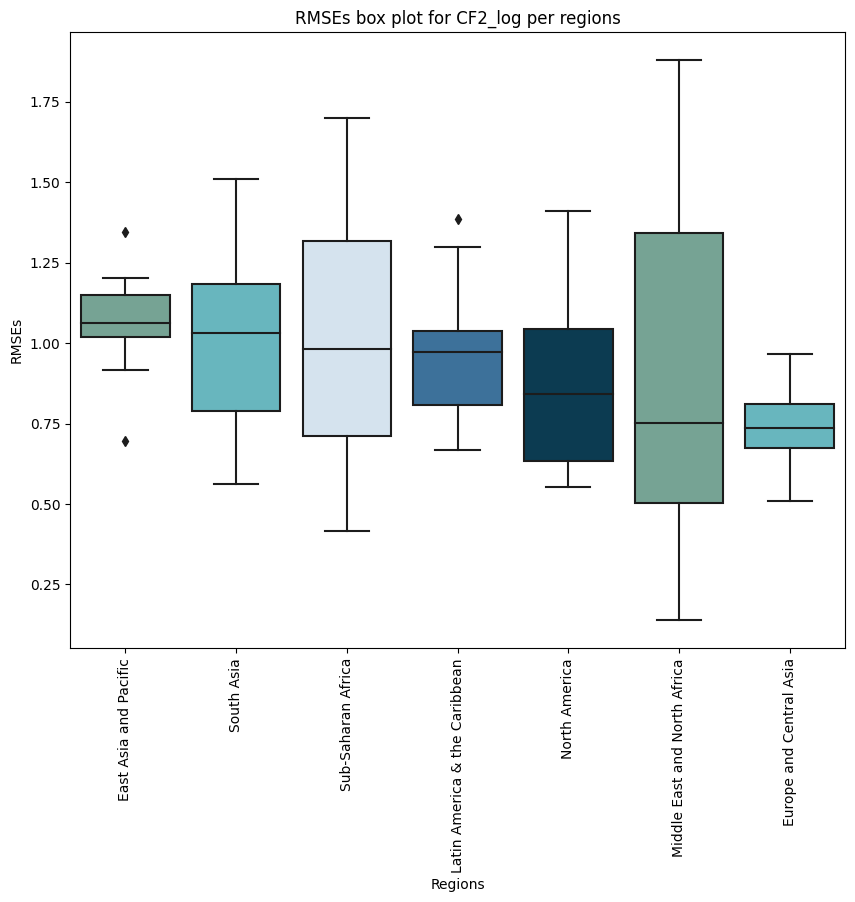

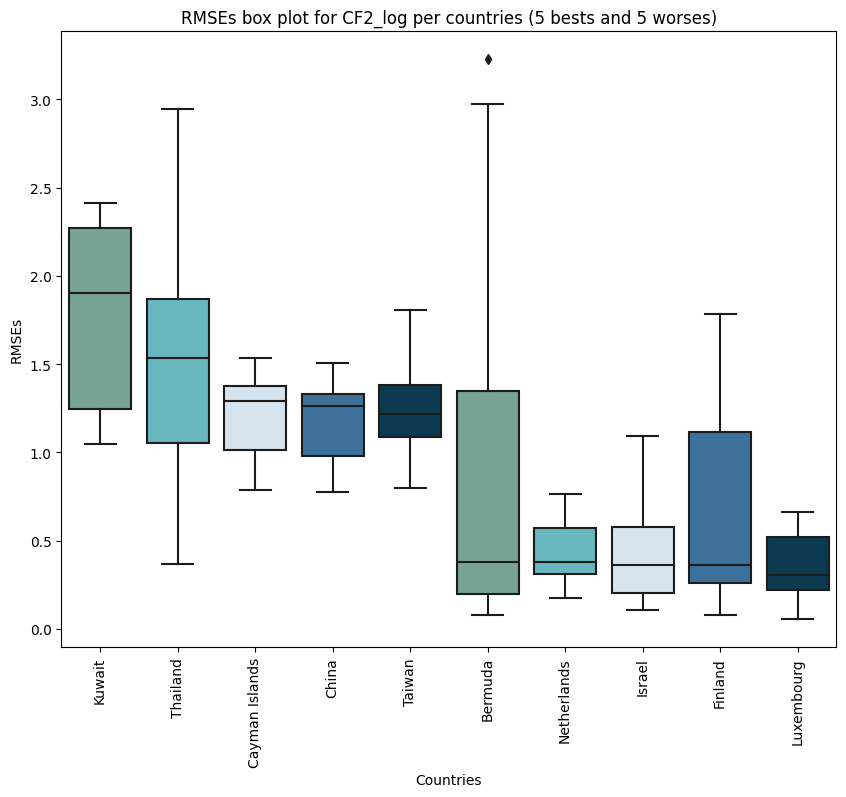

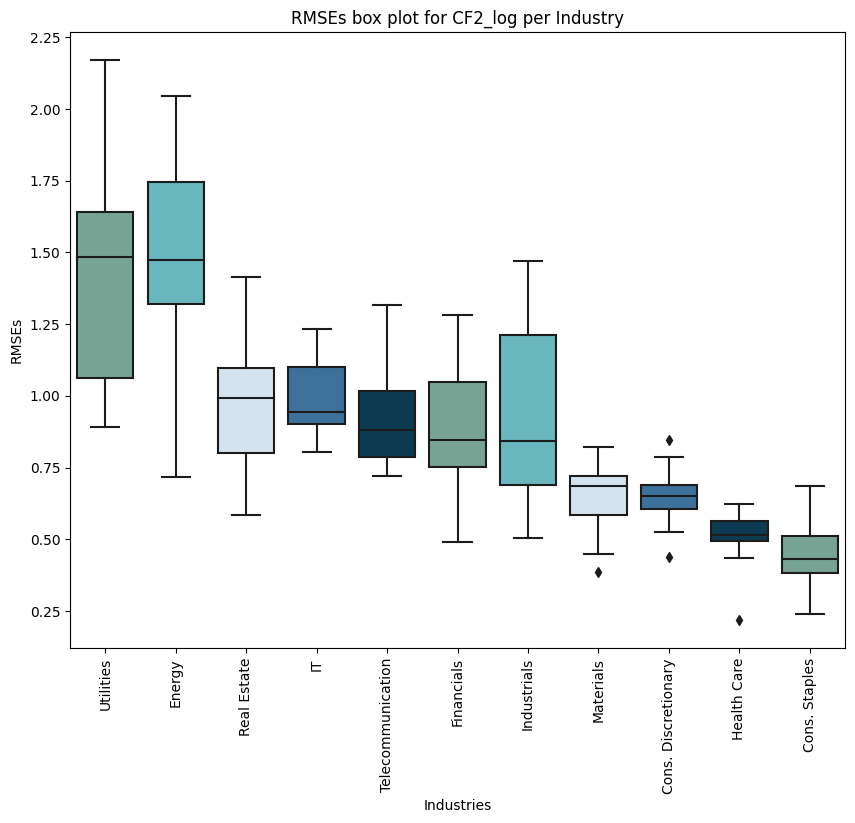

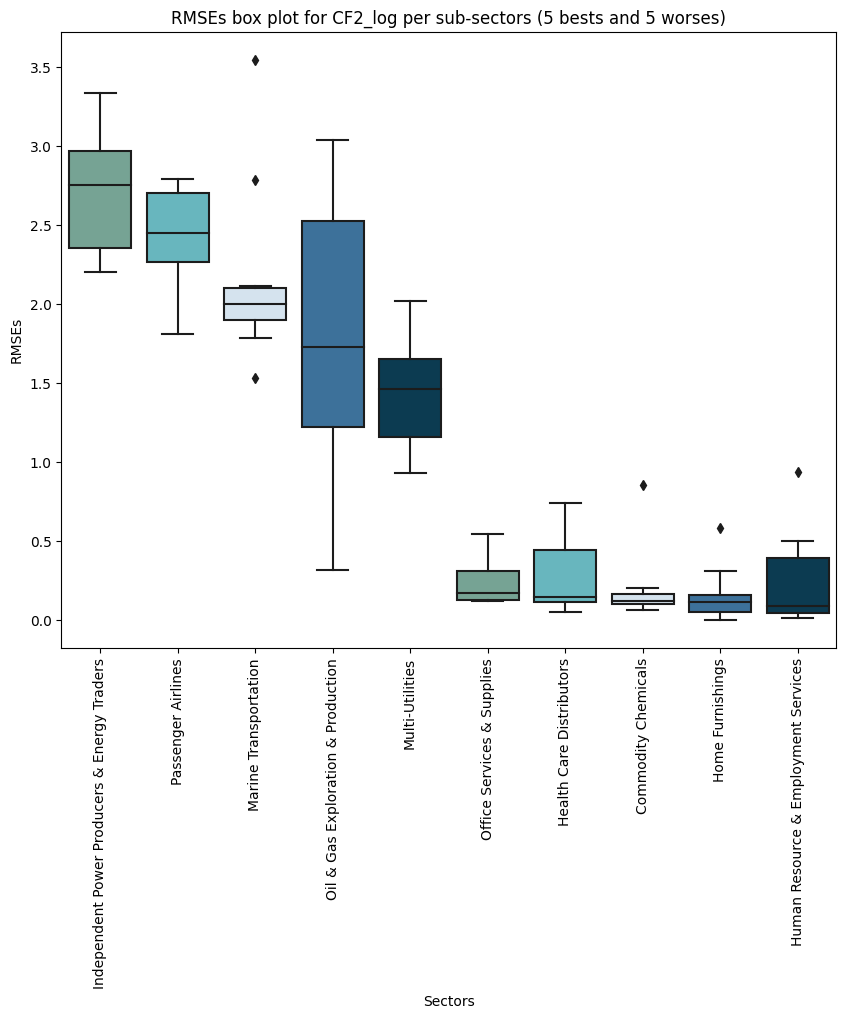

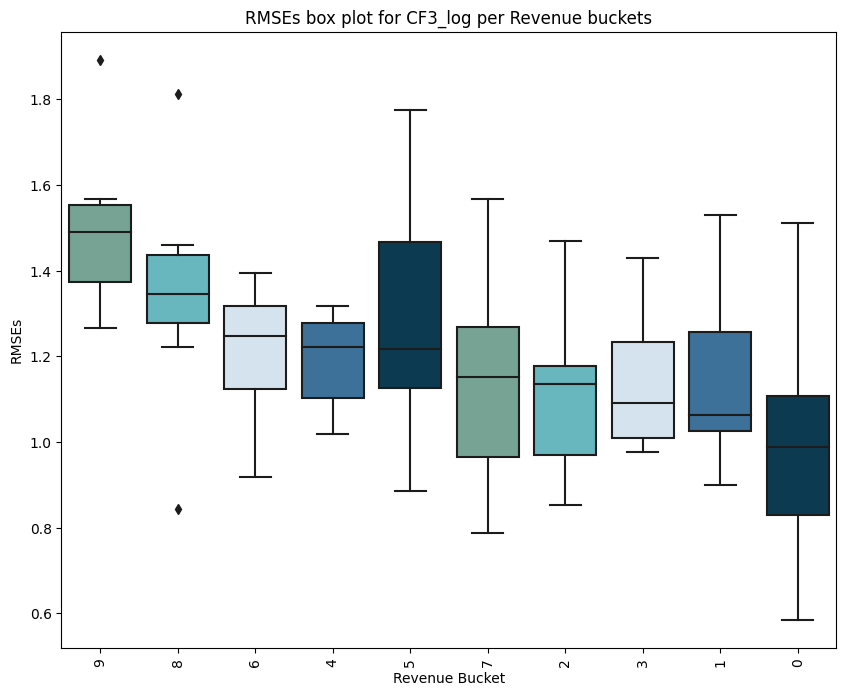

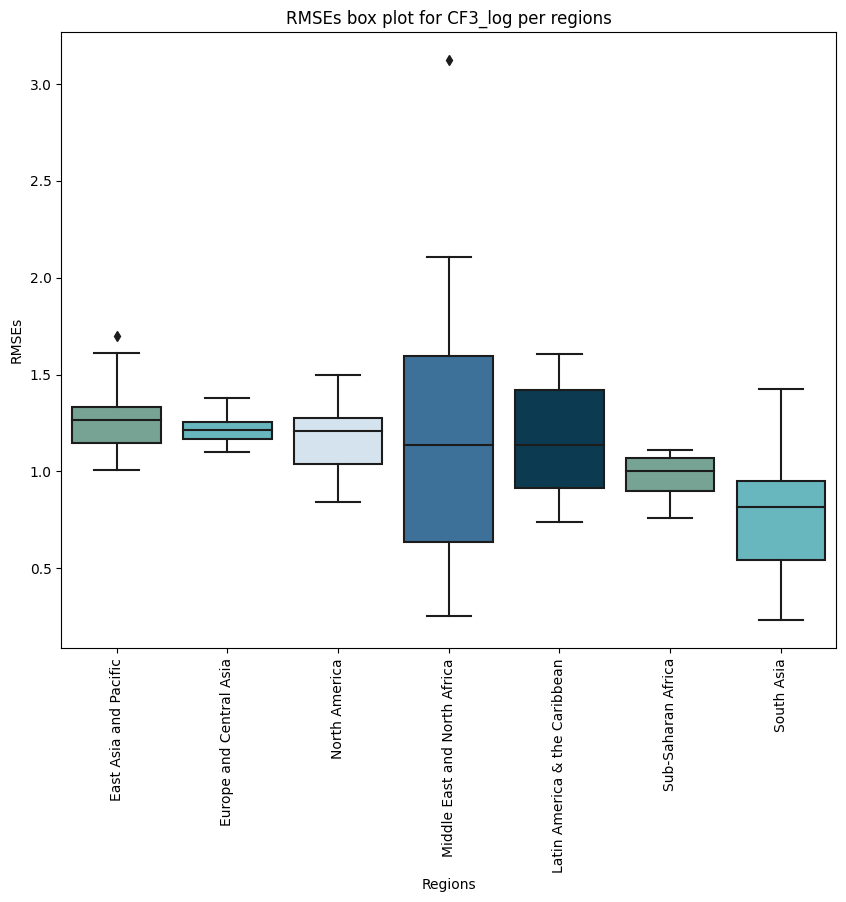

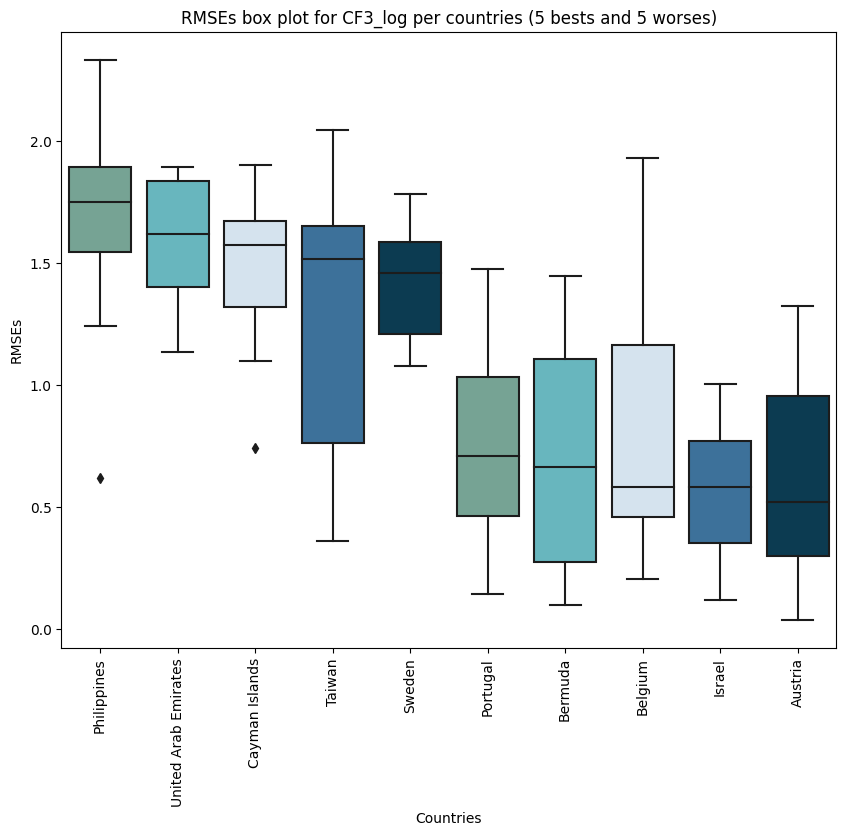

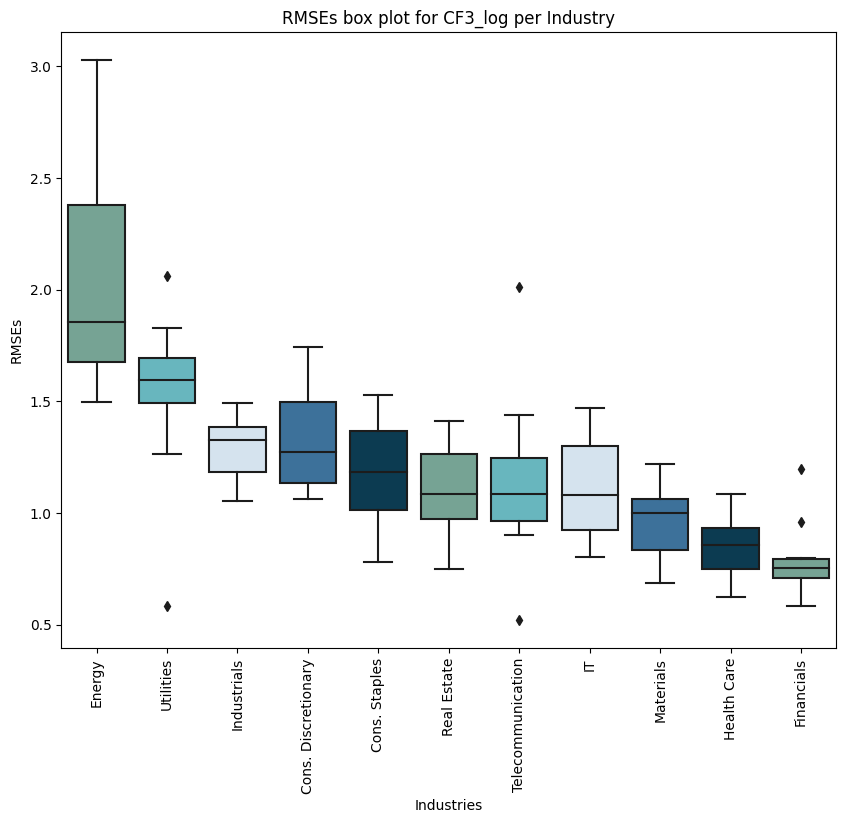

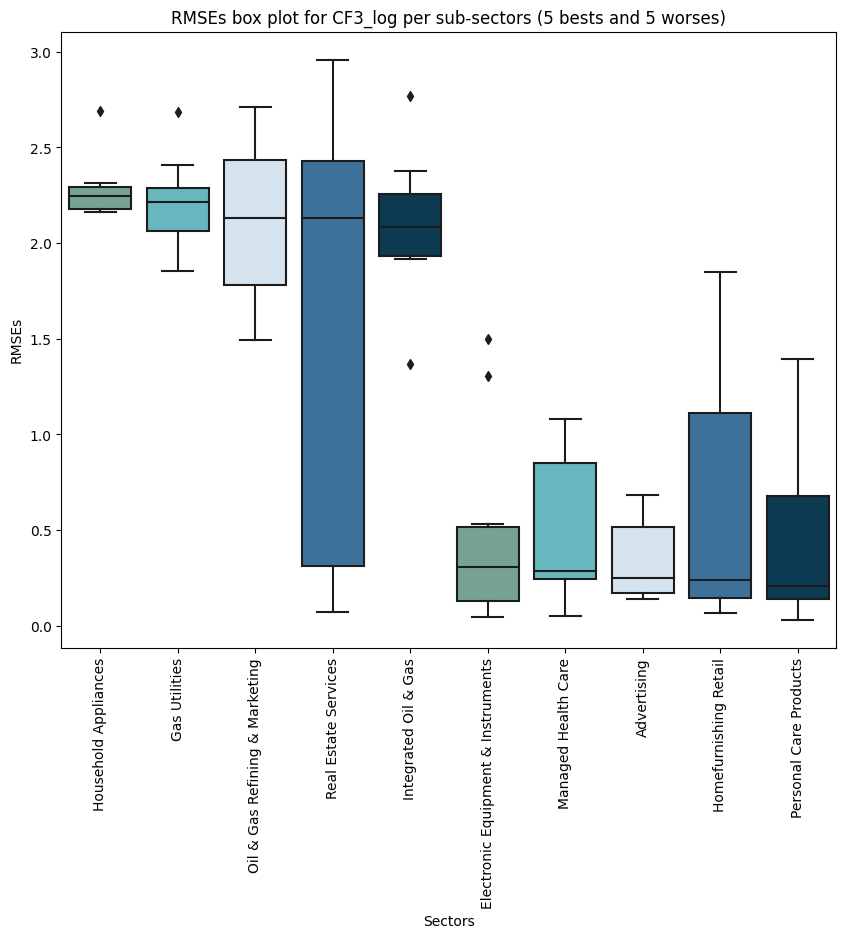

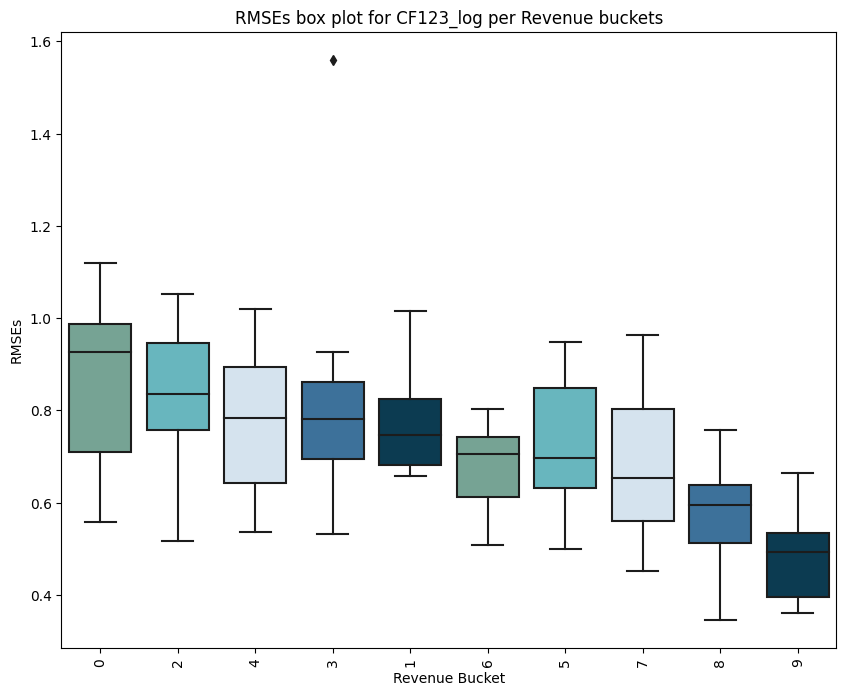

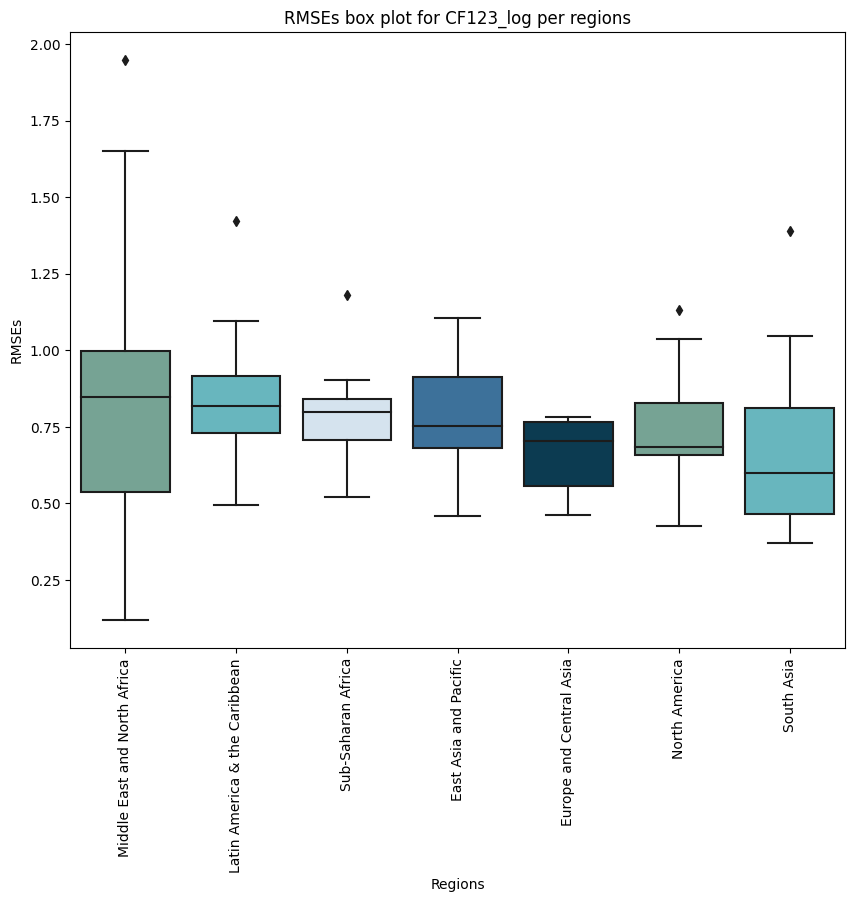

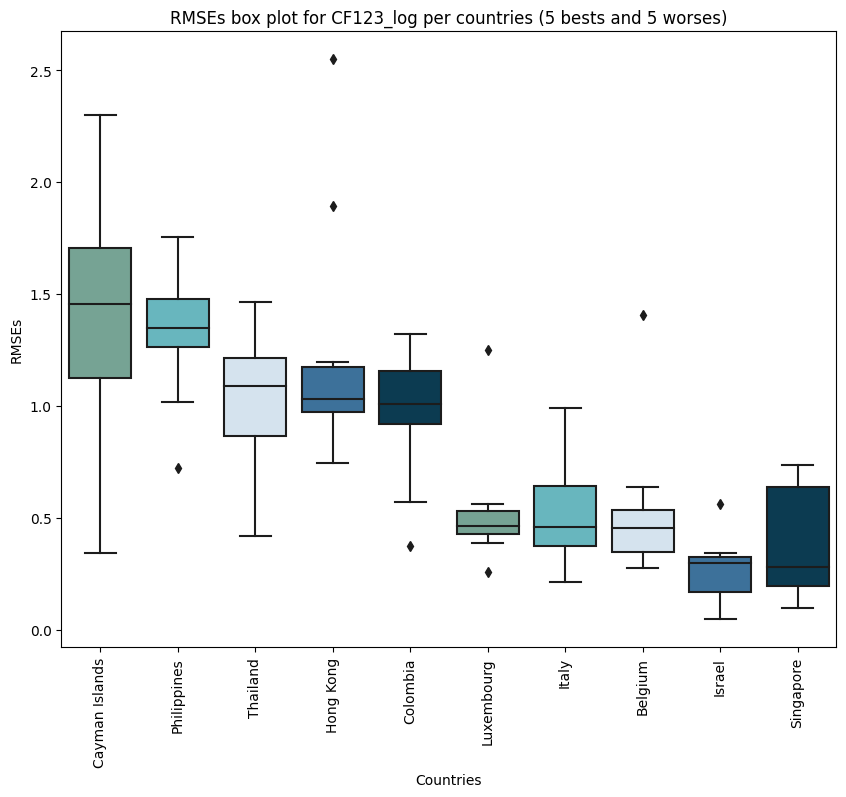

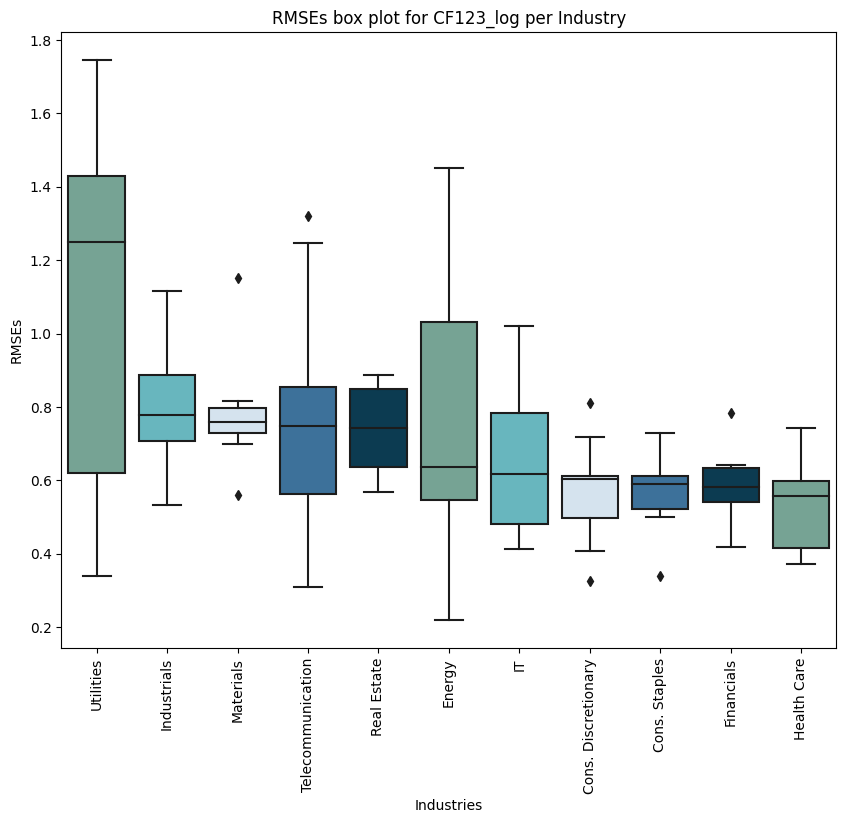

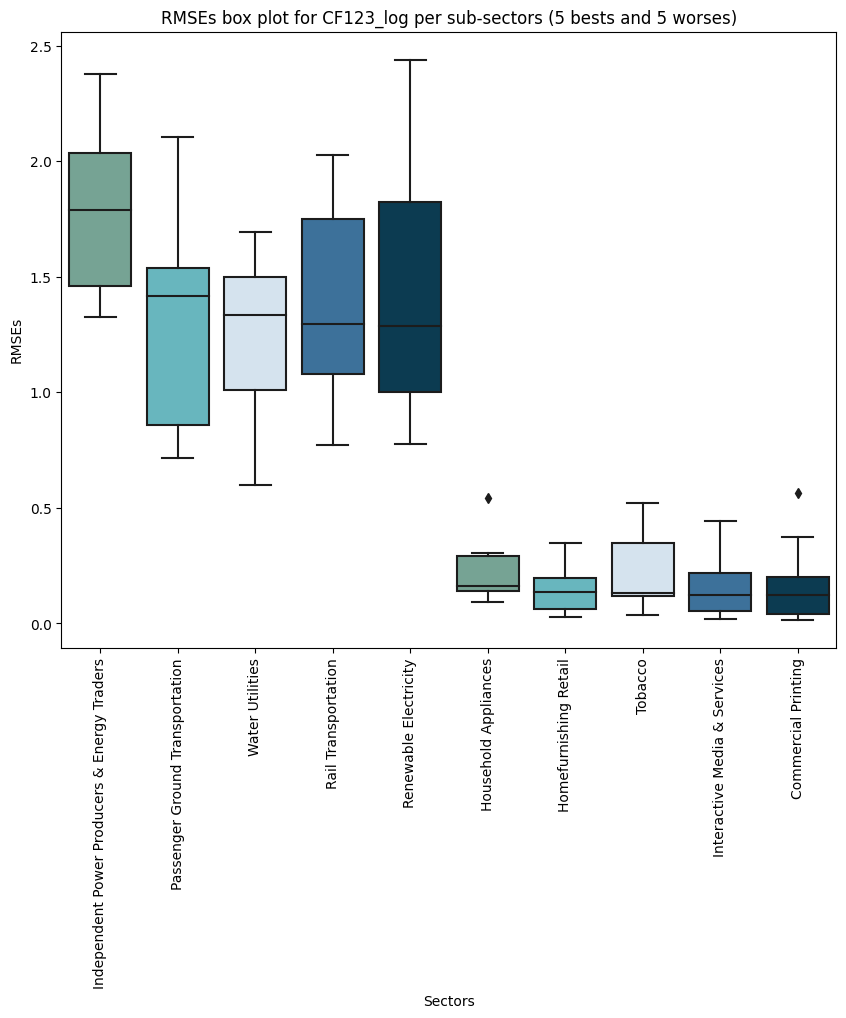

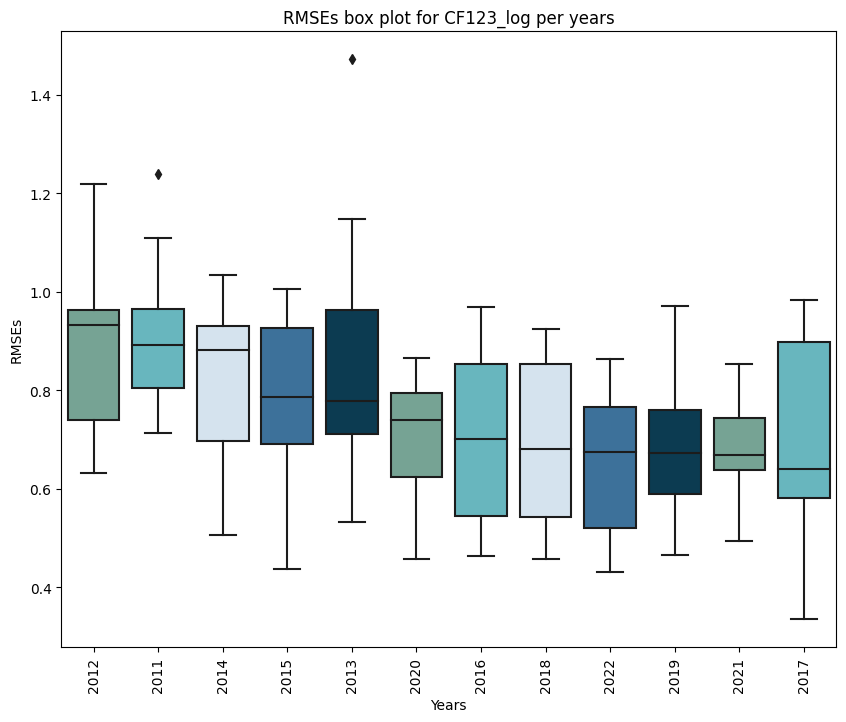

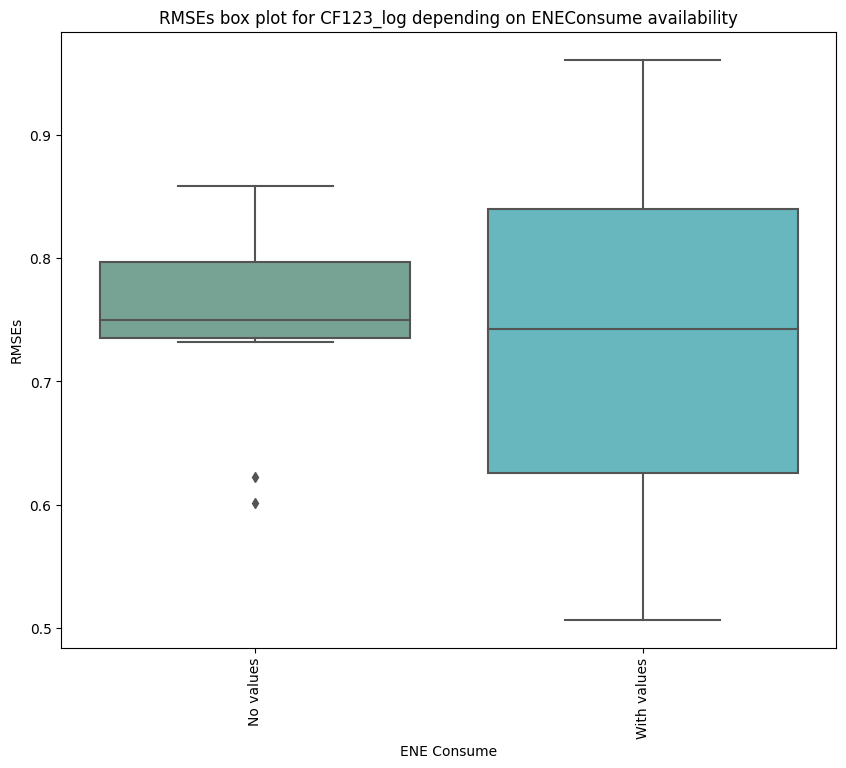

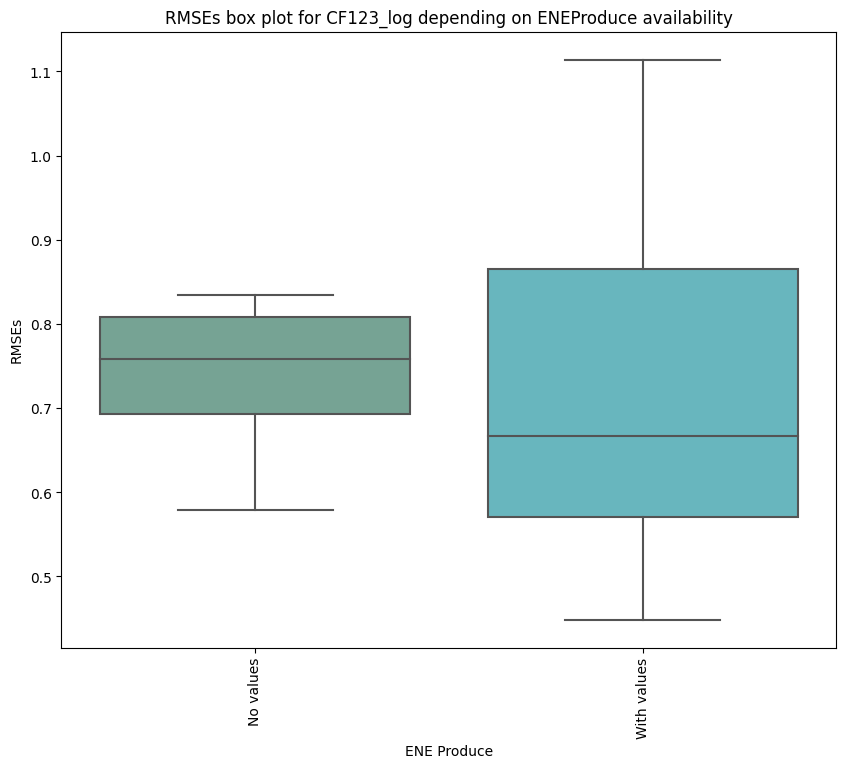

In [4]:
best_scores, best_stds, summary_global, summary_metrics_detailed = training_pipeline(
    path_Benchmark=path_Benchmark,
    path_results=path_results,
    path_models=path_models,
    path_intermediary=path_intermediary,
    path_plot = path_plot,
    targets=targets,
    models=models,
    Summary_Final=Summary_Final,
    ensemble=ensemble,
    summary_metrics_detailed=summary_metrics_detailed,
    estimated_scopes = estimated_scopes,
    preprocessed_dataset=preprocessed_dataset,
    training_parameters=training_parameters,
    restricted_features=restricted_features,
    save=save,
)

# Model application

In [ ]:

raw_dataset = load_data(path_rawdata, filter_outliers=False, save=False):
estimations = apply_model_on_raw_data(raw_dataset, path_intermediary=path_intermediary, path_models=path_models, path_results=path_results, save=False)
